This notebook describes the formation of Sinograms, describing how to process the 1D diffraction data into a sinogram.

In [1]:
# first the imports

import numpy as np
from numpy import deg2rad, swapaxes, transpose
import matplotlib.pyplot as plt
from h5py import File

In [2]:
#define a data loading function

def load_data(input_file):
    with File(input_file) as file:
        key = file["processed/result"]

        data = transpose(key["data"][0],(2,0,1))
        # data exists as 5000 q values for 40 points for 80 angular projections
    
        q_avg = np.sum(data, axis=(1,2))
        # q_avg sums the intensity for each q_val across all 80x40 pixels - sum over all 80x40 sinograms (for 25 micron)
    
        q = key["q"][:]
    
        angles = deg2rad(key["gts_cs_theta"])

    return data, q_avg, q, angles

In [4]:
file = "k11-43322-diffraction-DiffInt_Mask_Azz_Txt.nxs" #for file 43322 - change for others
data, q_avg, q, angles = load_data(file)

In [5]:
print(data.shape) #note there is only 79 projections for 43322 (still works)

(5000, 79, 40)


In [12]:
# for the sinogram I want to take the intensity of a specific q-value across all reduced 1D patterns

# lets use a q-value of 1.649 for sodium and 1.654 for zinc - taken from powder diffraction data
# these q-values are constant across scans

print("Sodium Peak = "+str(q[866])+" with an index of 866")
print("Zinc Peak = "+str(q[871])+"with an index of 871")

Sodium Peak = 1.648849769953991 with an index of 866
Zinc Peak = 1.6537507501500301with an index of 871


In [14]:
# Indexing the data prints a shape of [80,40] (or [79,40] for 43322) - this is the sinogram
# Each pixel corresponds to the intensity of that q-value for all the 1D patterns

print(data[0].shape)

(79, 40)


In [15]:
sodium_sino = data[866]
zinc_sino = data[871]

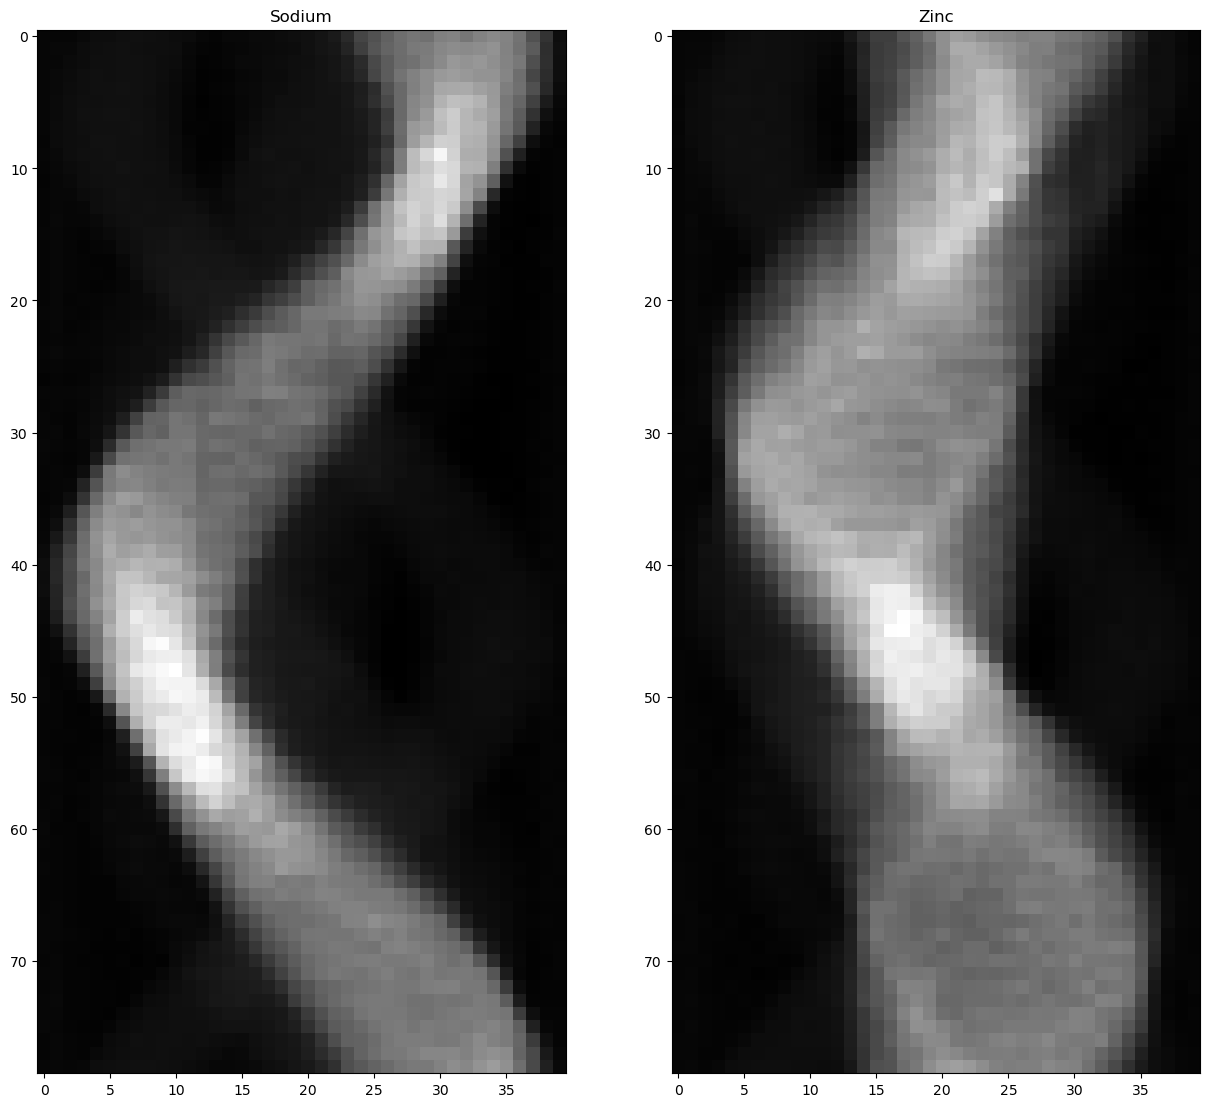

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,15))

#Sodium
ax[0].imshow(sodium_sino,cmap='gray')
ax[0].set_title("Sodium")

#Zinc
ax[1].imshow(zinc_sino,cmap='gray')
ax[1].set_title("Zinc")

plt.show()

In [ ]:
# This can be repeated for the 50 micron data too